# Machine Learning

***

```sh
$ conda install tensorflow
```


https://keras.io/

## Packages

***

In [1]:
# Numerical arrays.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

# Neural networks.
import tensorflow.keras as keras

## Single Neuron

***

![Neuron](img/neuron.svg)

## Single Input

***

![Single Input Neuron](img/neuron-single-input.svg)

$$y = mx + c$$

$$ \phi (x) = x $$

$$ \phi (w_1 x_1 + w_0 (1)) = w_1  x_1 + w_0 $$

In [2]:
# Identity activation function.
def identity(x):
    return x

In [3]:
# Firing a neuron.
def fire_neuron(x, w, phi):
    return phi(np.sum(x * w))

In [4]:
# Our x values - always has to have 1.0 at index 0.
x = np.array([1.0, 4.0])

# Our weights.
w = np.array([2.0, 3.0])

x, w

(array([1., 4.]), array([2., 3.]))

In [5]:
fire_neuron(x, w, identity)

14.0

## Data

***

In [6]:
# Real-world input values.
data_in = np.arange(1.0, 13.0, 1.0)

data_in

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [7]:
# Real-world output values.
data_out = 4.0 * data_in + np.random.normal(0.0, 1.0, len(data_in))

data_out

array([ 5.26465069,  8.11342668, 10.93033525, 14.97153525, 20.11393156,
       25.05291269, 29.49447491, 30.61847714, 36.38218347, 41.51552967,
       46.86470701, 48.81536136])

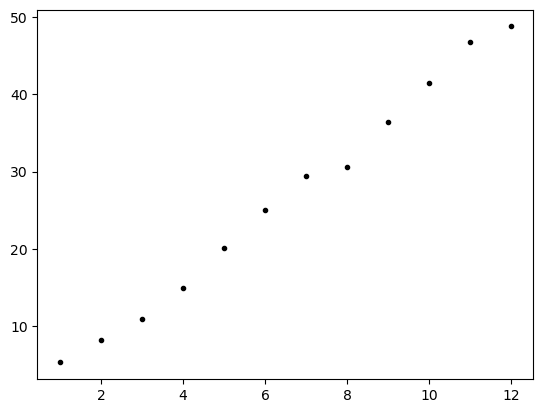

In [8]:
plt.plot(data_in, data_out, 'k.');

## Training

***

In [9]:
# An index in the data set.
i = 5

In [10]:
# Actual input/output pair from the real world.
data_in[i], data_out[i]

(6.0, 25.052912690858513)

In [11]:
# Initial weights.
w =  np.array([0.0, 1.0])

# What the neuron currently outputs for the real-world input, based on current weights.
fire_neuron(np.array([1.0, data_in[i]]), w, identity)

6.0

In [12]:
# The goal is to create an algorithm that updates w to move the output towards the real output.
# Initial weights.
w =  np.array([0.0, 4.0])

# What the neuron could output for the real-world input, based on better weights.
fire_neuron(np.array([1.0, data_in[i]]), w, identity)

24.0

## Cost

***

In [13]:
# Usually use sum of squares.
def cost(w, x, phi, y):
    pred = fire_neuron(x, w, phi)
    return (y - pred)**2

In [14]:
# An index in the data set.
i = 5

In [15]:
# Cost of initial w.
w = np.array([0.0, 1.0])

cost(w, data_in[i], identity, data_out[i])

363.0134820054774

In [16]:
# Cost of a "better" w.
w = np.array([0.0, 4.0])

cost(w, data_in[i], identity, data_out[i])

1.108625134570914

## Training

***

In [17]:
# Hyperparameter.
learning_rate = 0.001

In [18]:
def train_neuron(x, y, w, phi):
    # The possible adjustment to the weights.
    adjust = np.array([0.0, learning_rate])
    # Calculate the current cost.
    current = cost(w, x, phi, y)
    # Calculate the cost with slight adjustment to the weights.
    adding = cost(w + adjust, x, phi, y)
    # If the adjusted weights lower the cost, update the weights.
    if adding < current:
        w = w + adjust
    # Otherwise move in the other direction.
    else:
        w = w - adjust
    return w

In [19]:
# Set some initial weights.
w = np.array([0.0, 1.0])

In [20]:
# The training values.
data_in[i], data_out[i]

(6.0, 25.052912690858513)

In [21]:
# Current neuron output for data_in[i].
fire_neuron(np.array([1.0, data_in[i]]), w, identity)

6.0

In [22]:
# Nudge the weights towards better values.
w_improved = train_neuron(data_in[i], data_out[i], w, identity)
w_improved

array([0.   , 1.001])

In [23]:
# Current neuron output for data_in[i].
fire_neuron(np.array([1.0, data_in[i]]), w_improved, identity)

6.005999999999999

In [24]:
# Set some initial weights.
w = np.array([0.0, 1.0])

# Loop several times.
for epoch in range(10000):
    for i in range(len(data_in)):
        w = train_neuron(data_in[i], data_out[i], w, identity)

# Show w.
w

array([0.   , 4.056])

***

## End